## Project: Investigate a Dataset - [Dataset-No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset chosen for this analysis is the **No-show Appointments dataset**. It contains information on **100,000 medical appointments** in Brazil, with a focus on whether patients attended their scheduled appointments or not. The goal of this analysis is to identify factors that influence patient attendance.  

### Column Descriptions  

| Column Name       | Description |
|-------------------|-------------|
| **PatientId**     | Unique identifier for each patient |
| **AppointmentID** | Unique identifier for each appointment |
| **Gender**        | Patient's gender (`M` for male, `F` for female) |
| **ScheduledDay**  | The date and time when the appointment was scheduled |
| **AppointmentDay**| The date of the actual appointment |
| **Age**          | Age of the patient |
| **Neighbourhood**| The location of the hospital where the appointment was scheduled |
| **Scholarship**  | Indicates if the patient is enrolled in the Brazilian welfare program `Bolsa Família` (1 = Yes, 0 = No) |
| **Hipertension** | Indicates if the patient has hypertension (1 = Yes, 0 = No) |
| **Diabetes**     | Indicates if the patient has diabetes (1 = Yes, 0 = No) |
| **Alcoholism**   | Indicates if the patient has a history of alcoholism (1 = Yes, 0 = No) |
| **Handcap**      | Indicates if the patient has a disability (values range from 0 to 4, but mostly 0 or 1) |
| **SMS_received** | Whether the patient received an SMS reminder (1 = Yes, 0 = No) |
| **No-show**      | Indicates whether the patient **missed** their appointment (`No` = attended, `Yes` = missed) |

 **Note** One important detail in this dataset is that the **No-show** column is labeled as **"No" if the patient attended** and **"Yes" if they missed** the appointment.


### Questions


   - Does receiving an SMS seem to reduce or increase the no-show rate?

   - Are patients with hypertension, diabetes, or alcoholism more or less likely to attend their appointments?

   - Are there certain age groups that are more likely to miss appointments? If so, which ones


In [2]:
import pandas as pd 
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

#### load and clean Data

In [3]:
df_NoShow = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_NoShow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_NoShow.shape

(110527, 14)

#### Removing Null rows if any

In [5]:
df_NoShow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### remove duplicate rows if any

In [6]:
df_NoShow.duplicated().sum()

0

In [7]:
df_NoShow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df_NoShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [358]:
df_NoShow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### change date datatype from object to datetime

In [ ]:
df_NoShow['ScheduledDay'] = pd.to_datetime(df_NoShow['ScheduledDay'])
df_NoShow['AppointmentDay'] = pd.to_datetime(df_NoShow['AppointmentDay'])
df_NoShow['Neighbourhood'] = df_NoShow['Neighbourhood'].astype('category')
#convert data for No-show into numbers to more esier analysis
df_NoShow['No-show'] = df_NoShow['No-show'].str.strip().str.lower()
df_NoShow['No-show'] = df_NoShow['No-show'].map({'yes': 1, 'no': 0})
df_NoShow.info()

<a id='eda'></a>
## Exploratory Data Analysis

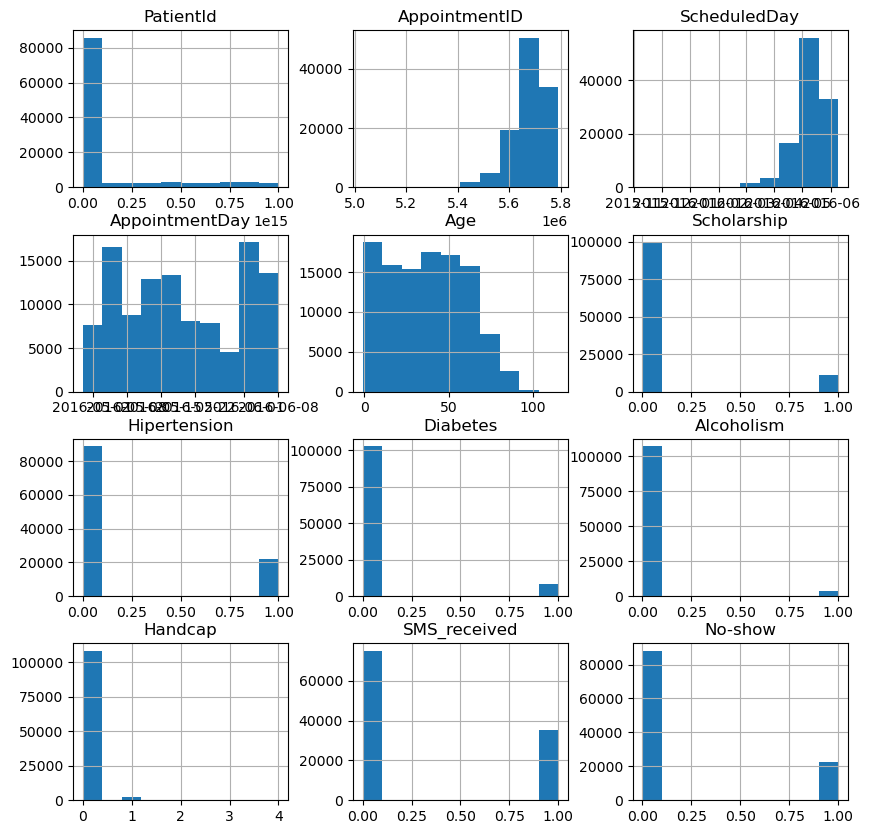

In [360]:
df_NoShow.hist(figsize=(10,10));

This histogram grid provides an overview of various patient attributes and their distributions:

- Age: Most patients are between 0 and 60 years old, with a few outliers above 100.
- Scholarship: Very few patients are enrolled in a government assistance program.
- Hypertension & Diabetes: A smaller portion of patients have these conditions.
- Alcoholism & Handicap: Both have low representation in the dataset.
- SMS Received: Most patients did not receive a reminder.
- No-Show: The majority of patients attended their appointments, but a portion still missed them.










#### Question 1: Does receiving an SMS seem to reduce or increase the no-show rate?

In [361]:
df_counts = df_NoShow.groupby(['No-show', 'SMS_received'])['SMS_received'].count()
df_counts

No-show  SMS_received
0        0               62510
         1               25698
1        0               12535
         1                9784
Name: SMS_received, dtype: int64

In [362]:
#calculate the percentage of the effect of the SMS recived on No-show
df_percentage = (df_counts / df_counts.sum() )* 100
df_percentage

No-show  SMS_received
0        0               56.556317
         1               23.250427
1        0               11.341120
         1                8.852136
Name: SMS_received, dtype: float64

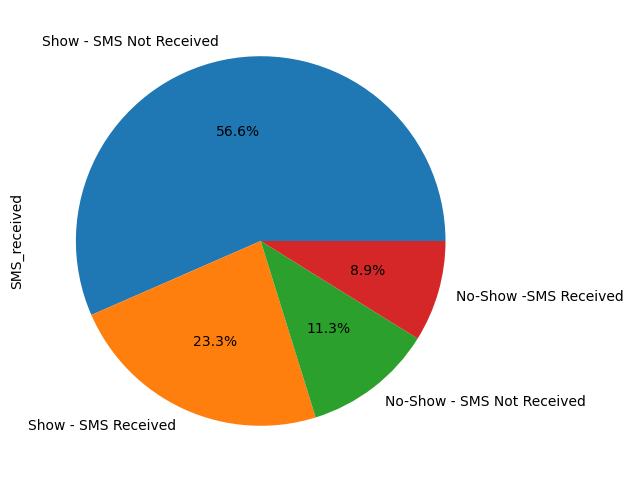

In [363]:
labels = ['Show - SMS Not Received', 'Show - SMS Received', 'No-Show - SMS Not Received', 'No-Show -SMS Received']
df_counts.plot(kind="pie",autopct='%1.1f%%',figsize=(12, 6), labels=labels);

This pie chart gives us a clear picture of how SMS reminders affect patient attendance. The biggest group (56.6%) consists of patients who didn’t get an SMS but still showed up for their appointment. Meanwhile, 23.3% received an SMS and attended, showing that reminders do have some impact. On the other hand, 11.3% didn’t receive an SMS and missed their appointment, and only 8.9% of those who got an SMS still didn’t show up. This suggests that while SMS reminders can help improve attendance, many patients are still responsible about showing up even without them.

In [398]:
df_NoShow.query("SMS_received == 0")["No-show"].value_counts()

No-show
0    62510
1    12535
Name: count, dtype: int64

#### Question 2: Are patients with hypertension, diabetes, or alcoholism more or less likely to attend their appointments?

In [364]:
df_NoShow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [9]:
#creat a new col to study all conitions in once
df_NoShow['has_condition'] = df_NoShow.apply(
    lambda x: 1 if (x['Hipertension'] == 1 or x['Diabetes'] == 1 or x['Alcoholism'] == 1) else 0, axis=1)
df_NoShow.groupby("No-show")["has_condition"].mean()


No-show
No     0.235058
Yes    0.200771
Name: has_condition, dtype: float64

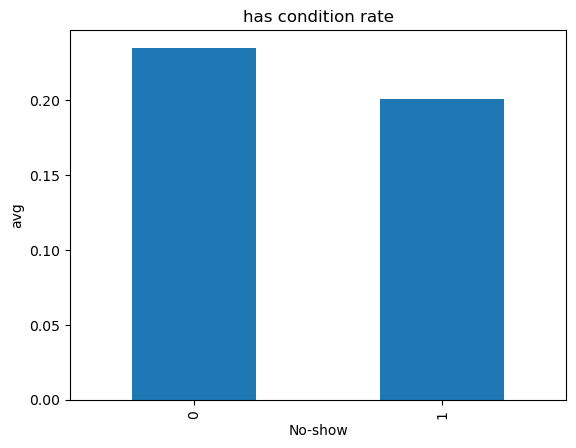

In [366]:
#bloting a bar plot
df_NoShow.groupby("No-show")["has_condition"].mean().plot(kind="bar",title="has condition rate",ylabel="avg");


This bar chart shows the average rate of patients with a medical condition based on whether they attended their appointment. Patients who showed up (group 0) have a slightly higher rate of medical conditions compared to those who missed their appointment (group 1). This could mean that patients with health conditions are more likely to keep their appointments because of the importance of their treatments. However, since the difference isn’t very large, it suggests that other factors—like reminders, accessibility, or personal circumstances—might also play a role in attendance.

In [367]:
def Calculate_Mean(condition):
    Mean_List = []
    for i in condition:
        Mean_List.append(df_NoShow.groupby(i)["No-show"].mean())
    return Mean_List
        

In [368]:
# calculate the mean value for each condition based on No-show
MeanC = Calculate_Mean(['Hipertension','Diabetes','Alcoholism'])
MeanC


[Hipertension
 0    0.209037
 1    0.173020
 Name: No-show, dtype: float64,
 Diabetes
 0    0.203628
 1    0.180033
 Name: No-show, dtype: float64,
 Alcoholism
 0    0.201946
 1    0.201488
 Name: No-show, dtype: float64]

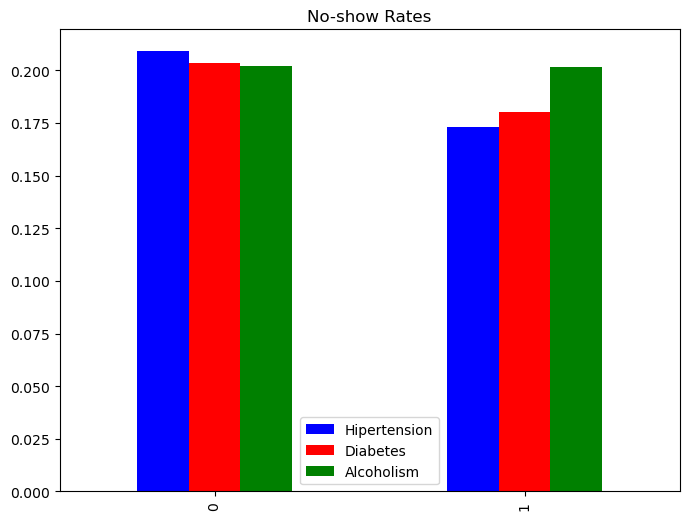

In [369]:
MeanC_df = pd.DataFrame(MeanC).T #used here changr raws into col into columns.
MeanC_df.columns = ['Hipertension', 'Diabetes', 'Alcoholism'] 

MeanC_df.plot(
    kind='bar',
    figsize=(8, 6),
    color=['blue', 'red', 'green'],  
    legend=True,
    title="No-show Rates"
);


This bar chart shows the no-show rates for patients with hypertension, diabetes, and alcoholism. The x-axis represents whether a patient attended (0) or missed (1) their appointment, while the y-axis shows the percentage of patients with each condition.

Patients who attended (0) have slightly higher rates of hypertension (blue) and diabetes (red) than alcoholism (green). However, among those who missed (1), alcoholism is the most common condition. This suggests that while hypertension and diabetes might encourage patients to attend, alcoholism may lead to more missed appointments.

These findings show the importance of focused support to help patients especially those with alcoholism keep their appointments.  


#### Question 3: Are there certain age groups that are more likely to miss appointments? If so, which ones?

In [ ]:
#Creat a new col for each group of age
df_NoShow['Age_group'] = df_NoShow['Age'].apply(lambda x: '(0-18)' if x <= 18 else '(18-60)' if x <= 60 else '(60+)')
df_NoShow.groupby("No-show")['Age_group'].value_counts()

No-show  Age_group
0        (18-60)      48932
         (0-18)       22520
         (60+)        16756
1        (18-60)      12966
         (0-18)        6347
         (60+)         3006
Name: count, dtype: int64

In [371]:
df_NoShow[df_NoShow['No-show'] == 1].groupby('Age_group').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,has_condition
Age_group,,,,,,,,,,,,,,,
(0-18),6347,6347,6347,6347,6347,6347,6347,6347,6347,6347,6347,6347,6347,6347,6347
(18-60),12966,12966,12966,12966,12966,12966,12966,12966,12966,12966,12966,12966,12966,12966,12966
(60+),3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006


In [373]:
GroupAgewithMaxMiss = df_NoShow[df_NoShow['No-show'] == 1].groupby('Age_group')['PatientId'].count()
GroupAgewithMaxMiss.idxmax(),GroupAgewithMaxMiss.max()

('(18-60)', 12966)

<Axes: >

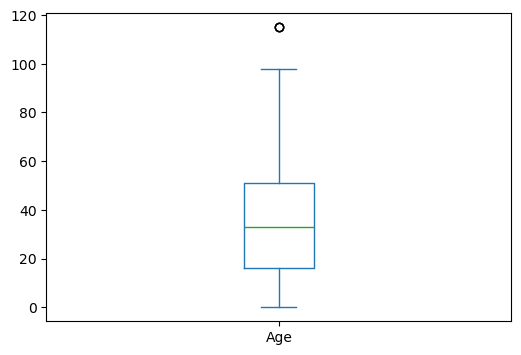

In [385]:
df_NoShow[df_NoShow['No-show'] == 1][['Age']].plot(kind='box', figsize=(6,4))


This box plot shows the age distribution of patients who missed their appointment (No-Show = 1):

- The median age (green line) is near the center, meaning the age spread is fairly balanced.
- Most no-show patients are between 20 and 50 years old.
- The whiskers show younger and older patients, with some extreme cases.
- An outlier above 100 years suggests that at least one very elderly patient missed their appointment.

This helps identify common no-show age groups and highlights any unusual patterns

In [386]:
df_NoShow["Age"].median()

37.0

<a id='conclusions'></a>
## Conclusions

### **Question 1: Does receiving an SMS reduce or increase the no-show rate?**

##### Among patients who did not receive an SMS:  
- **56.56%** attended their appointments.
- **11.34%** missed their appointments.
##### Among patients who received an SMS:  
- **23.25%** attended their appointments. 
- **8.85%** missed their appointments.

**Conclusion:**  
These results indicate that patients who **received an SMS had a higher no-show rate** (**8.85%**) compared to those who **did not receive an SMS** (**11.34%**).This suggests that SMS reminders **may not be effectively reducing no-shows** as expected and could even be Related with an **increase in missed appointments**.  

There are a few possible reasons why SMS reminders may not be reducing no-shows. First, some patients might ignore or forget the message, assuming they will remember the appointment on their own. Second, the timing or wording of the SMS might not be effective in encouraging them to confirm or reschedule.

   ### **Question 2: Are patients with hypertension, diabetes, or alcoholism more or less likely to attend their appointments?**


 when considering whether a patient has **any** of these conditions (**hypertension, diabetes, or alcoholism**):  
- Patients **with at least one of these conditions** had a show rate of **23.51%**.  
- Patients  **without any of these conditions** had a show rate of **20.08%**.
  
**Conclusion:**  
Patients with at least one of these conditions were more likely to attend their appointments compared to those without any condition, This suggests that individuals with long-term health conditions that usually last for months or years may prioritize their healthcare visits more due to the necessity of ongoing medical care. 
 
And from calculating each condition mean it shows that Patients with **hypertension and diabetes were more likely to attend their appointments** compared to those without these conditions. **Alcoholism did not appear to significantly affect appointment attendance**,that shows People with alcoholism may find it hard to attend medical appointments because their condition causes issues like dependence, denial, or other health problems that make it difficult to prioritize care.    


### **Question 3: Are there certain age groups that are more likely to miss appointments? If so, which ones?**

Based on the analysis, the age group **(18-60)** had the **highest number of missed appointments** (12966 no-shows).  

**Conclusion:**  
People aged 18-60 years seem to miss appointments the most. This might be because of challenges like work or personal responsibilities that stop them from going to medical appointments.More research could look into whether things like work hours, lifestyle, or understanding the importance of medical visits.

### **Analysis Summary**

This analysis found that SMS reminders were not significant in reducing no-shows. Hypertensive and diabetic patients were more likely to attend, while alcoholism did not have a significant impact. Young adults between **18-60 years** of age had the most missed appointments, probably due to work or personal reasons. These findings point towards the need for better reminder systems and ways of increasing attendance at appointments.


### Limitation

A limitation of this analysis is that it is based on the available data and does not account for personal reasons behind missed appointments, such as forgetfulness, transportation issues, or sudden emergencies.


In [1]:
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 539751 bytes to Investigate_a_Dataset.html
